<a href="https://colab.research.google.com/github/Flying010/DeepFakeAudioiProject/blob/main/DecisionTree_DeepFakeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
final = pd.read_csv('/content/gdrive/My Drive/fake-news/train.csv')
test_dataset = pd.read_csv('/content/gdrive/My Drive/fake-news/test.csv')
submit_dataset = pd.read_csv('/content/gdrive/My Drive/fake-news/submit.csv')
test_dataset['label'] = submit_dataset['label']

frames = [final, test_dataset]

news_dataset = pd.concat(frames)


In [ ]:
news_dataset.isnull().sum()

id           0
title      680
author    2460
text        46
label        0
dtype: int64

In [ ]:
#Replacing the missing values with empty string
news_dataset = news_dataset.fillna('')
#news_dataset.iat[0,3] = "HI"
#news_dataset.iat[0,3]

In [ ]:
# Merge title and author cols
news_dataset['content'] = news_dataset['author']+ ' '+ news_dataset['title']
news_dataset['content']

0       Darrell Lucus House Dem Aide: We Didn’t Even S...
1       Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2       Consortiumnews.com Why the Truth Might Get You...
3       Jessica Purkiss 15 Civilians Killed In Single ...
4       Howard Portnoy Iranian woman jailed for fictio...
                              ...                        
5195    Jody Rosen The Bangladeshi Traffic Jam That Ne...
5196    Sheryl Gay Stolberg John Kasich Signs One Abor...
5197    Mike McPhate California Today: What, Exactly, ...
5198     300 US Marines To Be Deployed To Russian Bord...
5199    Teddy Wayne Awkward Sex, Onscreen and Off - Th...
Name: content, Length: 26000, dtype: object

In [ ]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content


In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
#Separating the target and features
X = news_dataset['content'].values
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'mike mcphate california today exactli sushi new york time',
       'us marin deploy russian border norway',
       'teddi wayn awkward sex onscreen new york time'], dtype=object)

In [ ]:
Y = news_dataset['label'].values
Y

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
print(X)

  (0, 17288)	0.2781166125472449
  (0, 2716)	0.3693871882860092
  (0, 8465)	0.24935613493111794
  (0, 9497)	0.290825608206731
  (0, 3250)	0.2422331119224367
  (0, 14828)	0.25354922096224614
  (0, 5460)	0.23257096486999831
  (0, 292)	0.2687157895589713
  (0, 4153)	0.26978240443495427
  (0, 7716)	0.21726269299124773
  (0, 9798)	0.3693871882860092
  (0, 3947)	0.36572148274252403
  (1, 2063)	0.15482456635576514
  (1, 2427)	0.3785747505554428
  (1, 18506)	0.302866130276713
  (1, 1635)	0.2955188023757639
  (1, 3085)	0.19140110904389093
  (1, 7506)	0.1909783988504311
  (1, 6041)	0.7148288693257809
  (1, 3913)	0.2637495226080166
  (2, 5911)	0.38560410675769785
  (2, 6567)	0.34955443497637173
  (2, 10596)	0.4947014614528309
  (2, 17205)	0.4172932979023739
  (2, 3231)	0.31666291960534937
  :	:
  (25996, 11356)	0.08066725476410413
  (25996, 8604)	0.1780565335099132
  (25997, 5494)	0.47911338942972304
  (25997, 16321)	0.522197410135636
  (25997, 16897)	0.34050601125337576
  (25997, 10362)	0.3812054

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, stratify= Y, random_state = 1)
print(X.shape,X_train.shape, Y.shape, Y_train.shape)

(26000, 18866) (20800, 18866) (26000,) (20800,)


In [ ]:
#Model Training
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)

In [ ]:
#Acc score on training data
train_prediction = model.predict(X_train)
train_acc = accuracy_score(train_prediction, Y_train)
print("Training data accuracy:", train_acc)

Training data accuracy: 0.9975480769230769


In [ ]:
# Acc score on test data
test_prediction = model.predict(X_test)
test_acc = accuracy_score(test_prediction, Y_test)
print("Test data accuracy:", test_acc)

Test data accuracy: 0.8894230769230769


In [ ]:
#Data to calculate accuracy test data set
test_ratio = [0]*(1+len(Y_test))
test_id = [0]*(1+len(Y_test))
index = 0
cnt = 0

final_length = 0

for i in range(0,len(test_prediction)):
  #print(ratio[index])
  index += 1

  #print(ratio)
  if(test_prediction[i] == Y_test[i]):
    cnt += 1
  test_ratio[index] = (cnt/(index))
  test_id[index] = index
  if(i % 100 == 0):
    #print(final_length)
    final_length+=1

In [ ]:
#Final data to plot a few points of test data
test_finalratio = [0]*(final_length)
test_finalid = [0]*(final_length)

for i in range(0, final_length):
  test_finalratio[i] = test_ratio[i*100]
  test_finalid[i] = test_id[i*100]

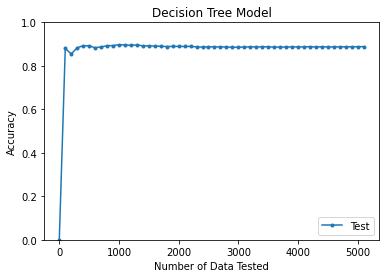

In [ ]:
plt.plot(test_finalid, test_finalratio, marker = '.')
plt.ylim(0, 1)
plt.title('Decision Tree Model')
plt.ylabel('Accuracy')
plt.xlabel('Number of Data Tested')
plt.legend(['Test'], loc='lower right')
plt.show()

[Text(0.5, 0.8333333333333334, 'X[18716] <= 0.064\ngini = 0.5\nsamples = 20800\nvalue = [10181, 10619]'),
 Text(0.25, 0.5, 'X[2063] <= 0.041\ngini = 0.406\nsamples = 14509\nvalue = [4109, 10400]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'X[16848] <= 0.032\ngini = 0.067\nsamples = 6291\nvalue = [6072, 219]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

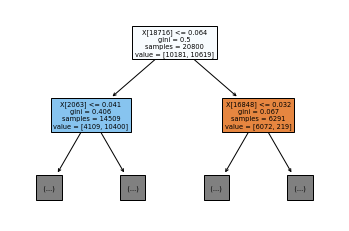

In [ ]:
tree.plot_tree(model, max_depth = 1, filled = True)

In [ ]:
print(model.get_depth())

1234


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


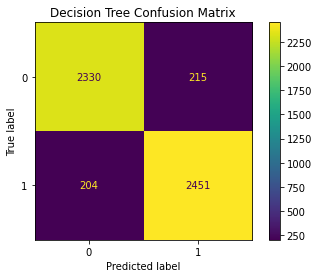

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(X_train, Y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, Y_test)  
plt.title("Decision Tree Confusion Matrix")
plt.show()